## Pre EDA of the dataset

### Abstract
This report analyzes a dataset containing information about different campus buildings, including their built year, category, gross floor area, room area, and capacity.

### Introduction
Understanding the trends and patterns in campus building data is crucial for effective resource allocation and planning. This analysis aims to uncover insights that can contribute to better decision-making in managing campus facilities.

### Related Work
Previous studies on campus infrastructure management have highlighted the importance of optimizing space utilization, improving energy efficiency, and enhancing overall user experience. By building upon this existing research, we can further refine strategies for sustainable and efficient campus development.

### Data Analysis 1: General Trend and Pattern
The general trend in the dataset reveals a mix of building categories, with a significant portion falling under the "mixed use" category. The built years span from the late 19th century to recent years, indicating a diverse age range of campus buildings. The gross floor area and room area vary widely across buildings, reflecting different sizes and purposes.

### Data Analysis 2: Underlying Structure and Anomalies
Upon deeper analysis, anomalies and unexpected patterns emerge. For instance, some buildings have zero capacity or room area, which could indicate data errors or specific building types not accounted for in typical capacity metrics. Additionally, the "leased" category stands out as a unique classification, suggesting potential opportunities for further investigation into campus leasing practices.

### Discussion/Comment
Based on the observations, it's essential to ensure data integrity by addressing anomalies and inconsistencies. Furthermore, exploring the dynamics of leased spaces can provide insights into collaborative arrangements that benefit the campus community. Implementing data-driven strategies for space optimization and sustainability can significantly contribute to the overall campus environment.

### Conclusions
In conclusion, this analysis sheds light on the diverse landscape of campus buildings and highlights areas for improvement in data quality and utilization. By leveraging these insights, universities can enhance their infrastructure management practices and create more efficient and user-centric campus environments.



### Import Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


In [32]:
df = pd.read_csv('../Final_dataset/building_meta.csv')
df

,campus_id,id,built_year,category,gross_floor_area,room_area,capacity
0,1,1,NaN,other,NaN,NaN,NaN
1,1,2,NaN,other,NaN,NaN,NaN
2,1,3,NaN,other,NaN,NaN,NaN
3,1,4,1967.0,mixed use,145558.14,1790.17,79.0
4,1,5,1899.0,other,0.00,NaN,NaN
...,...,...,...,...,...,...,...
59,1,60,1966.0,mixed use,1208347.84,7756.22,691.0
60,1,61,1966.0,mixed use,1208347.84,7756.22,691.0
61,1,62,1968.0,teaching,1274716.17,7615.16,1331.0
62,1,63,1972.0,mixed use,1640647.38,12387.62,1362.0


In [33]:
# Display the first few rows of the DataFrame
print(df.head())

   campus_id  id  built_year   category  gross_floor_area  room_area  capacity
0          1   1         NaN      other               NaN        NaN       NaN
1          1   2         NaN      other               NaN        NaN       NaN
2          1   3         NaN      other               NaN        NaN       NaN
3          1   4      1967.0  mixed use         145558.14    1790.17      79.0
4          1   5      1899.0      other              0.00        NaN       NaN


In [34]:
# Summary statistics
print(df.describe())

       campus_id         id   built_year  gross_floor_area     room_area  \
count  64.000000  64.000000    58.000000      6.000000e+01     40.000000   
mean    1.234375  32.500000  1972.534483      7.639116e+05   5097.224000   
std     0.526811  18.618987    35.896643      1.162664e+06   3441.994092   
min     1.000000   1.000000  1899.000000      0.000000e+00    253.330000   
25%     1.000000  16.750000  1967.000000      1.171750e+03   2732.527500   
50%     1.000000  32.500000  1972.000000      1.453922e+05   5174.470000   
75%     1.000000  48.250000  1998.000000      1.262933e+06   6355.820000   
max     3.000000  64.000000  2019.000000      5.459749e+06  15175.560000   

          capacity  
count    40.000000  
mean    584.600000  
std     437.880782  
min       0.000000  
25%     202.750000  
50%     644.000000  
75%     781.000000  
max    1595.000000  


In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   campus_id         64 non-null     int64  
 1   id                64 non-null     int64  
 2   built_year        58 non-null     float64
 3   category          64 non-null     object 
 4   gross_floor_area  60 non-null     float64
 5   room_area         40 non-null     float64
 6   capacity          40 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 3.6+ KB


In [36]:
df.nunique()


campus_id            3
id                  64
built_year          29
category             8
gross_floor_area    52
room_area           39
capacity            35
dtype: int64

In [37]:
(df.isnull().sum()/(len(df)))*100


campus_id            0.000
id                   0.000
built_year           9.375
category             0.000
gross_floor_area     6.250
room_area           37.500
capacity            37.500
dtype: float64

In [38]:
df.isnull().sum()


campus_id            0
id                   0
built_year           6
category             0
gross_floor_area     4
room_area           24
capacity            24
dtype: int64

### Statistics Summary
The information gives a quick and simple description of the data.

Can include Count, Mean, Standard Deviation, median, mode, minimum value, maximum value, range, standard deviation, etc.

Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

In python, this can be achieved using describe()

describe() function gives all statistics summary of data

describe()– Provide a statistics summary of data belonging to numerical datatype such as int, float

In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
campus_id,64.0,1.234375,5.268109e-01,1.00,1.0000,1.00,1.00,3.00
id,64.0,32.500000,1.861899e+01,1.00,16.7500,32.50,48.25,64.00
built_year,58.0,1972.534483,3.589664e+01,1899.00,1967.0000,1972.00,1998.00,2019.00
gross_floor_area,60.0,763911.574333,1.162664e+06,0.00,1171.7500,145392.17,1262933.13,5459748.90
room_area,40.0,5097.224000,3.441994e+03,253.33,2732.5275,5174.47,6355.82,15175.56
capacity,40.0,584.600000,4.378808e+02,0.00,202.7500,644.00,781.00,1595.00


In [10]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
campus_id,64.0,NaN,NaN,NaN,1.234375,0.526811,1.0,1.0,1.0,1.0,3.0
id,64.0,NaN,NaN,NaN,32.5,18.618987,1.0,16.75,32.5,48.25,64.0
built_year,58.0,NaN,NaN,NaN,1972.534483,35.896643,1899.0,1967.0,1972.0,1998.0,2019.0
category,64,8,mixed use,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross_floor_area,60.0,NaN,NaN,NaN,763911.574333,1162664.07748,0.0,1171.75,145392.17,1262933.13,5459748.9
room_area,40.0,NaN,NaN,NaN,5097.224,3441.994092,253.33,2732.5275,5174.47,6355.82,15175.56
capacity,40.0,NaN,NaN,NaN,584.6,437.880782,0.0,202.75,644.0,781.0,1595.0


In [50]:
df = df.dropna()
df

,campus_id,id,built_year,category,gross_floor_area,room_area,capacity
3,1,4,1967.0,mixed use,145558.14,1790.17,79.0
5,1,6,1998.0,other,6210.75,473.03,0.0
6,1,7,1980.0,teaching,176996.61,2377.77,799.0
14,1,15,1967.0,other,15728.40,1709.43,0.0
15,1,16,1992.0,mixed use,786493.89,5681.03,737.0
16,1,17,1967.0,mixed use,1259005.45,5129.22,616.0
17,1,18,1972.0,mixed use,1405706.16,5353.08,775.0
19,1,20,1973.0,residence,42646.40,871.42,0.0
22,1,23,1970.0,office,558322.60,4626.98,481.0
23,1,24,1967.0,mixed use,1558475.10,5485.43,552.0


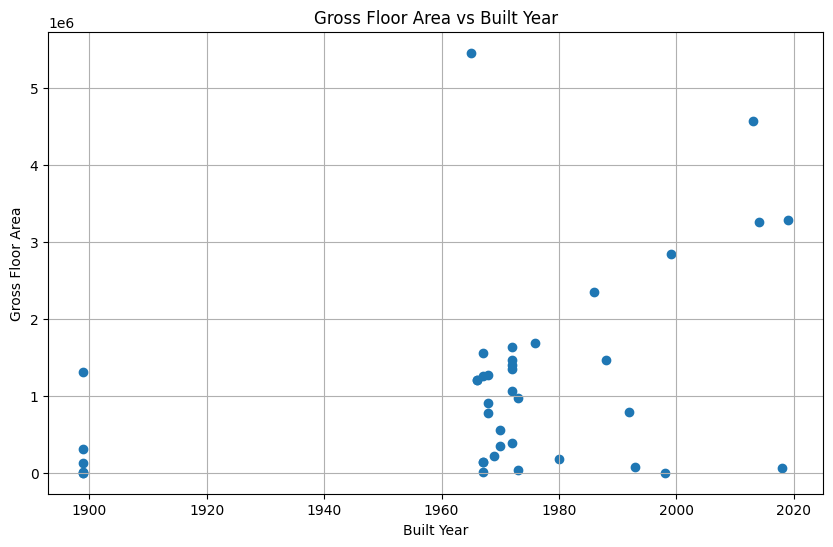

In [12]:
# Plotting gross floor area vs built year
plt.figure(figsize=(10, 6))
plt.scatter(df['built_year'], df['gross_floor_area'])
plt.xlabel('Built Year')
plt.ylabel('Gross Floor Area')
plt.title('Gross Floor Area vs Built Year')
plt.grid(True)
plt.show()

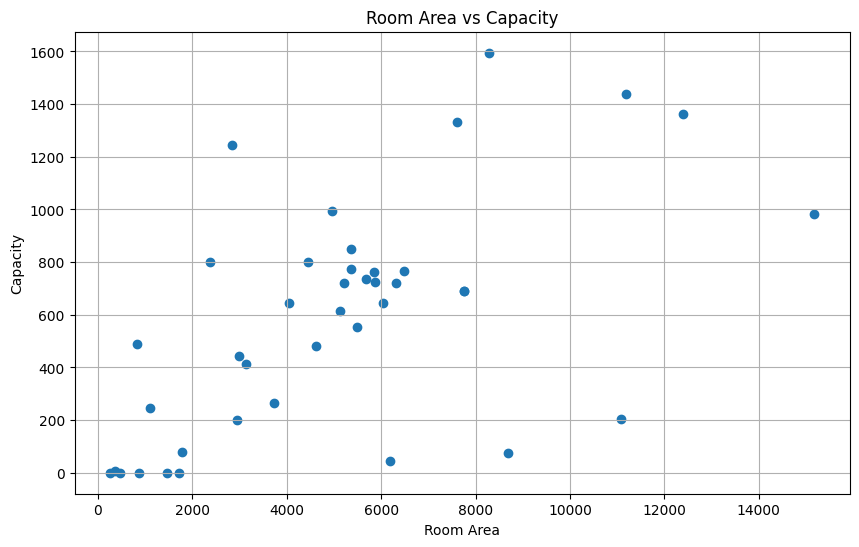

In [13]:
# Plotting room area vs capacity
plt.figure(figsize=(10, 6))
plt.scatter(df['room_area'], df['capacity'])
plt.xlabel('Room Area')
plt.ylabel('Capacity')
plt.title('Room Area vs Capacity')
plt.grid(True)
plt.show()

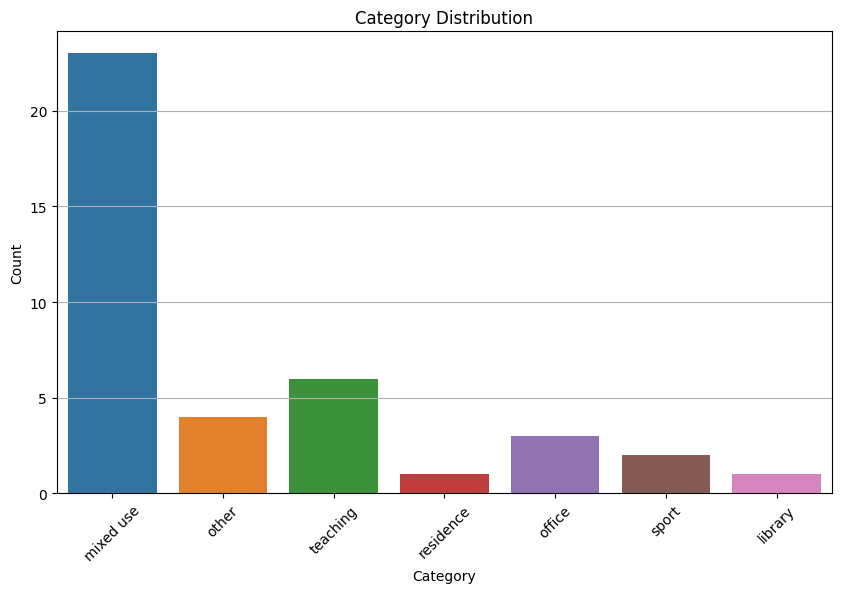

In [14]:
# Plotting category distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### EDA Bivariate Analysis
Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

In our example, a pair plot has been used to show the relationship between two Categorical variables.

C:\Users\Ibtasam Ahmad\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2300x1700 with 0 Axes>

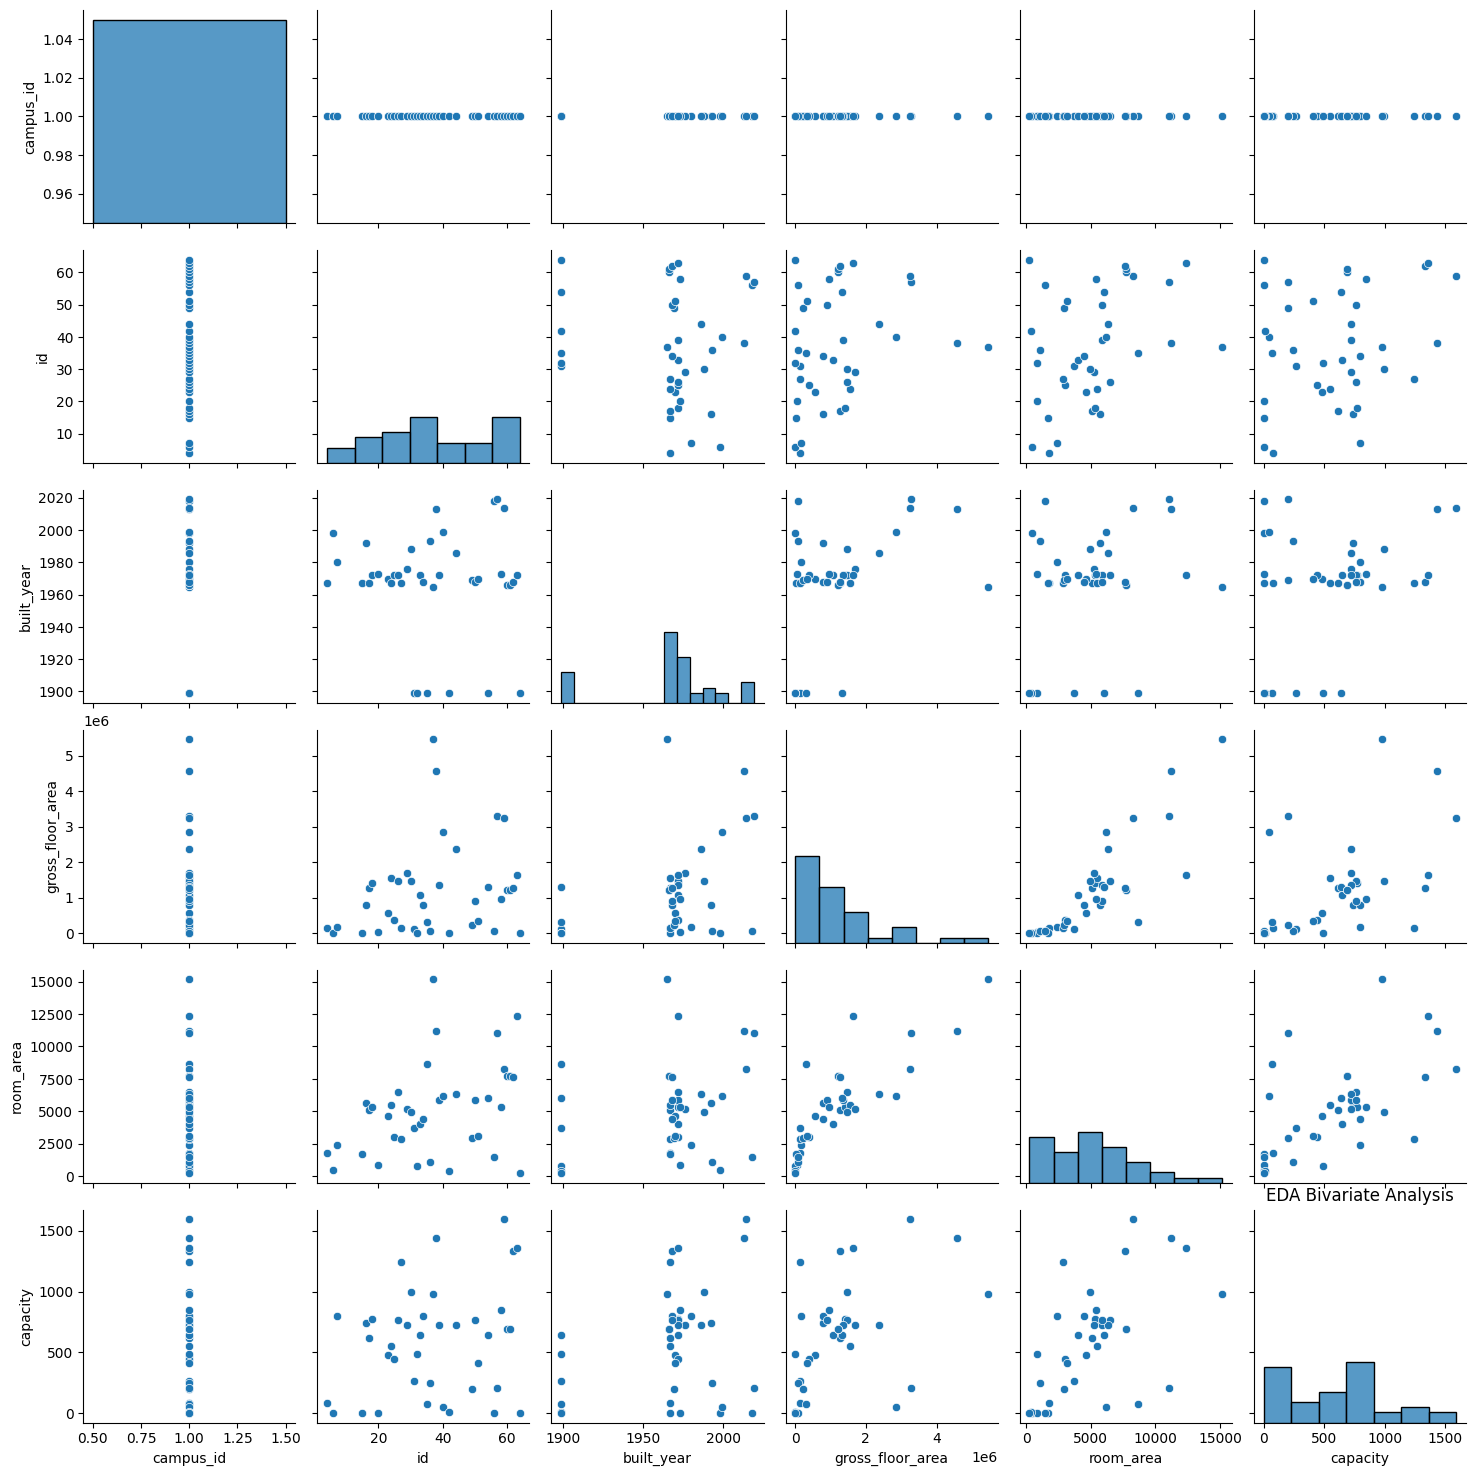

In [15]:
plt.figure(figsize=(23,17))
sns.pairplot(df)
plt.title('EDA Bivariate Analysis')
plt.show()

### EDA Multivariate Analysis
As the name suggests, Multivariate analysis looks at more than two variables. Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.

##### A heat map is widely been used for Multivariate Analysis

Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

In our example heat map shows the correlation between the variables.

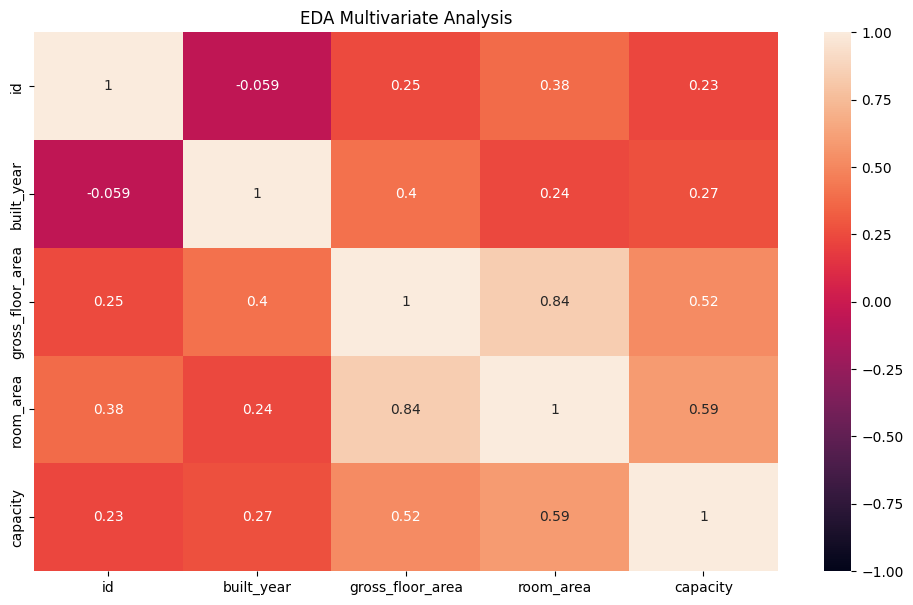

In [16]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.drop(['campus_id', 'category'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.title('EDA Multivariate Analysis')
plt.show()

### Distribution of Consumption:

Plot a histogram or density plot to visualize the distribution of consumption.
Calculate summary statistics such as mean, median, standard deviation, min, max, etc., for consumption.

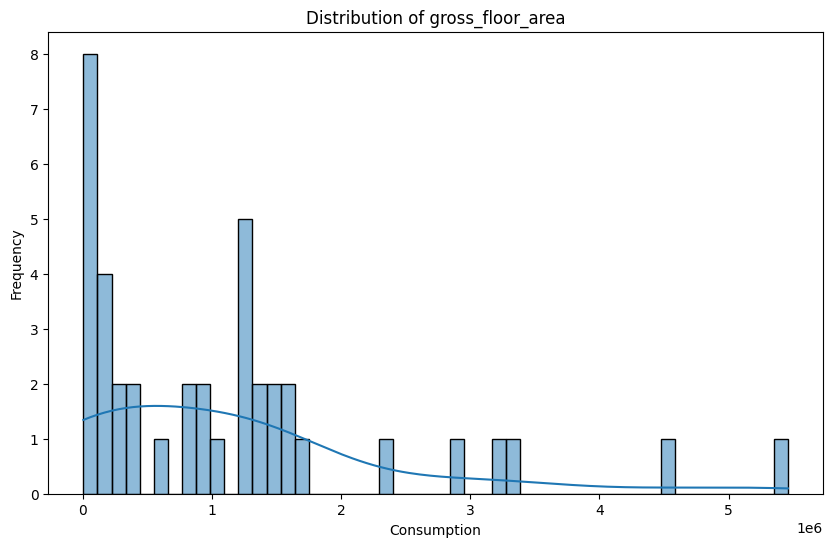

In [17]:
# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['gross_floor_area'], bins=50, kde=True)
plt.title('Distribution of gross_floor_area')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.show()

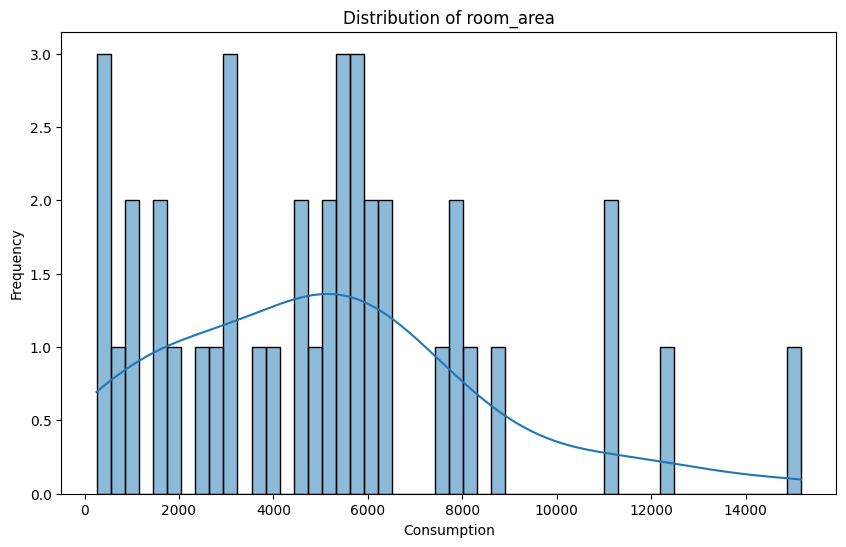

In [18]:
# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['room_area'], bins=50, kde=True)
plt.title('Distribution of room_area')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.show()

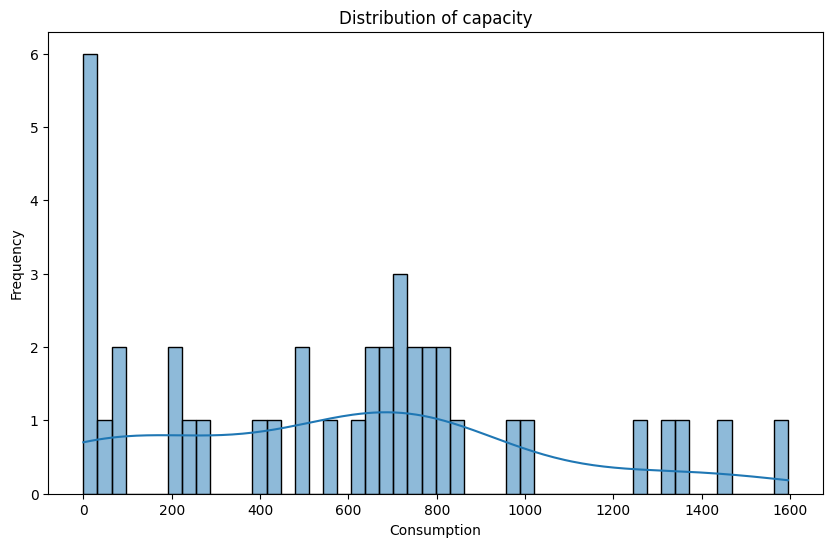

In [22]:
# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['capacity'], bins=50, kde=True)
plt.title('Distribution of capacity')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.show()

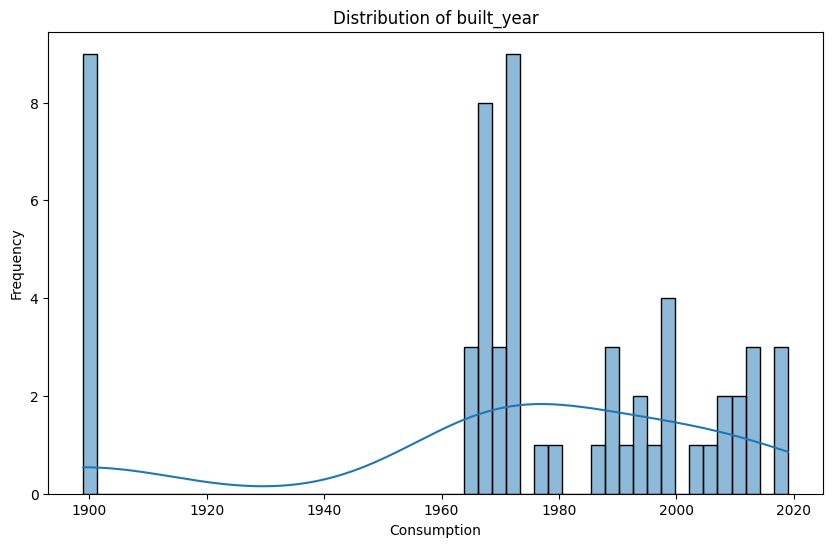

In [43]:
# Distribution of Consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['built_year'], bins=50, kde=True)
plt.title('Distribution of built_year')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.show()

In [20]:
print("\nSummary Statistics for Consumption:")
print(df['gross_floor_area'].describe())


Summary Statistics for Consumption:
count    4.000000e+01
mean     1.145156e+06
std      1.264035e+06
min      4.249980e+03
25%      1.454752e+05
50%      9.399679e+05
75%      1.464959e+06
max      5.459749e+06
Name: gross_floor_area, dtype: float64


In [21]:
print("\nSummary Statistics for Consumption:")
print(df['room_area'].describe())


Summary Statistics for Consumption:
count       40.000000
mean      5097.224000
std       3441.994092
min        253.330000
25%       2732.527500
50%       5174.470000
75%       6355.820000
max      15175.560000
Name: room_area, dtype: float64


In [23]:
print("\nSummary Statistics for Consumption:")
print(df['capacity'].describe())


Summary Statistics for Consumption:
count      40.000000
mean      584.600000
std       437.880782
min         0.000000
25%       202.750000
50%       644.000000
75%       781.000000
max      1595.000000
Name: capacity, dtype: float64


In [44]:
print("\nSummary Statistics for Consumption:")
print(df['built_year'].describe())


Summary Statistics for Consumption:
count      58.000000
mean     1972.534483
std        35.896643
min      1899.000000
25%      1967.000000
50%      1972.000000
75%      1998.000000
max      2019.000000
Name: built_year, dtype: float64


### Histograms for Demand, Generation, and Flow Values:


In [26]:
df.columns

Index(['campus_id', 'id', 'built_year', 'category', 'gross_floor_area',
       'room_area', 'capacity'],
      dtype='object')

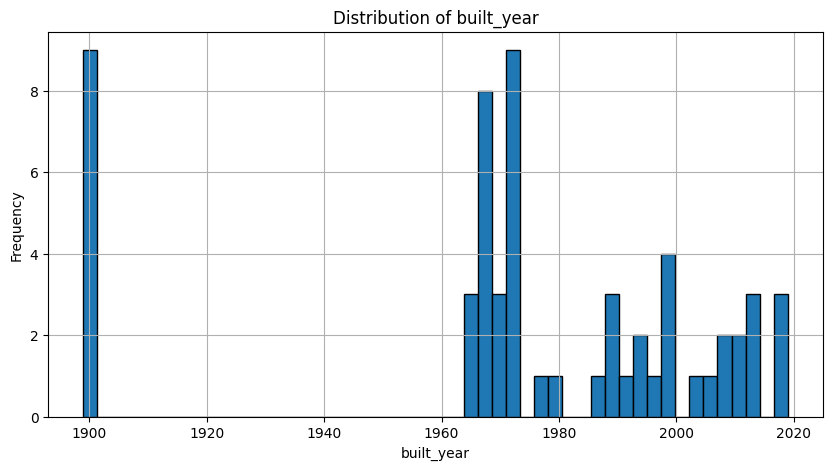

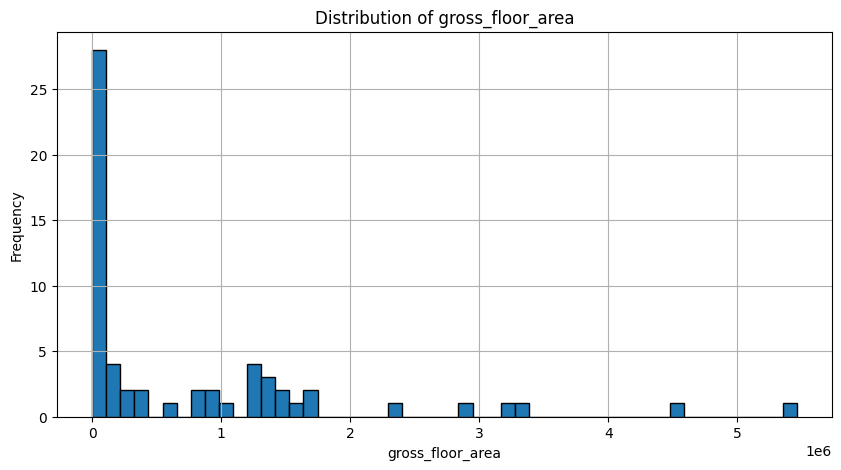

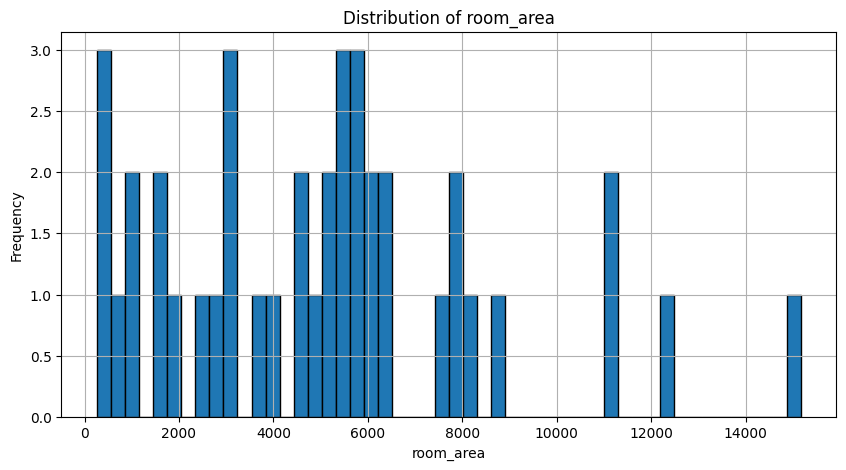

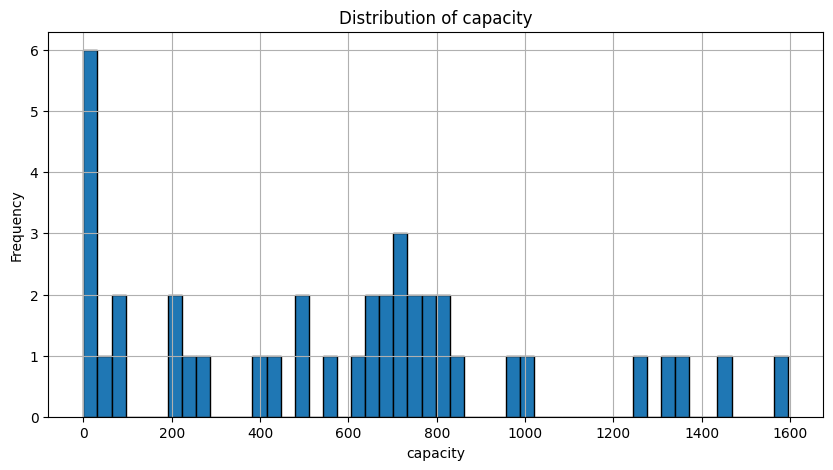

In [45]:
# List of relevant columns
columns_to_plot = ['built_year', 'gross_floor_area', 'room_area', 'capacity']

for col in columns_to_plot:
    plt.figure(figsize=(10, 5))
    plt.hist(df[col], bins=50, edgecolor='k')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


### Identification of Outliers using Boxplots:

In [51]:
df.isnull().sum()

campus_id           0
id                  0
built_year          0
category            0
gross_floor_area    0
room_area           0
capacity            0
dtype: int64

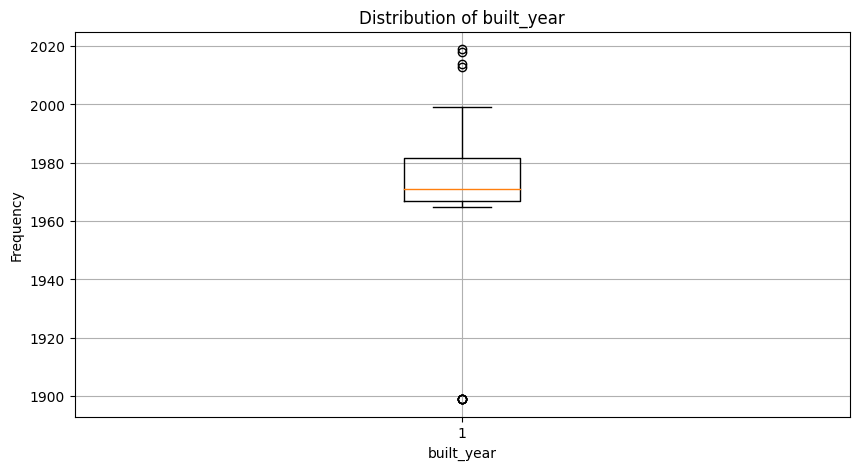

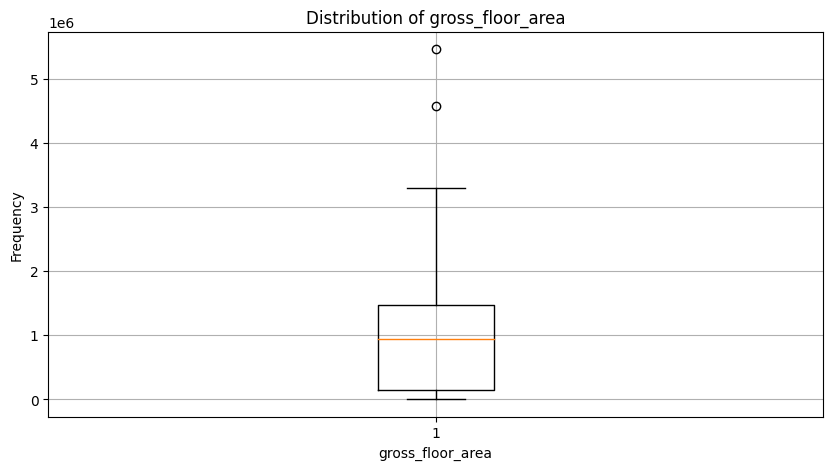

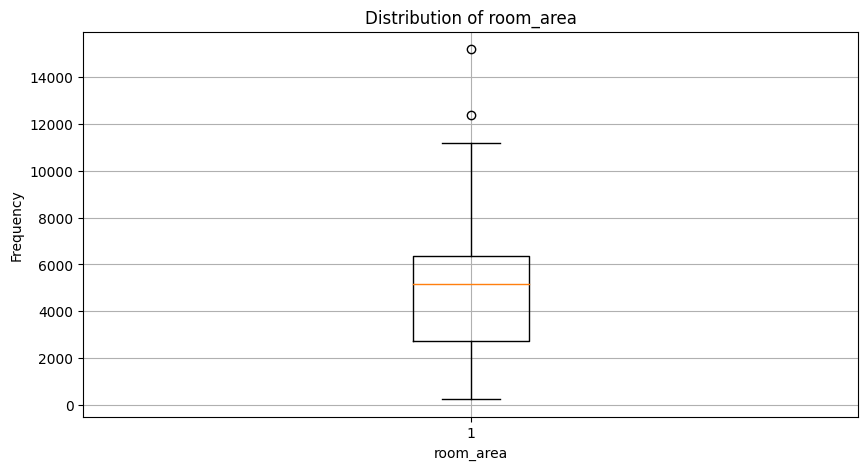

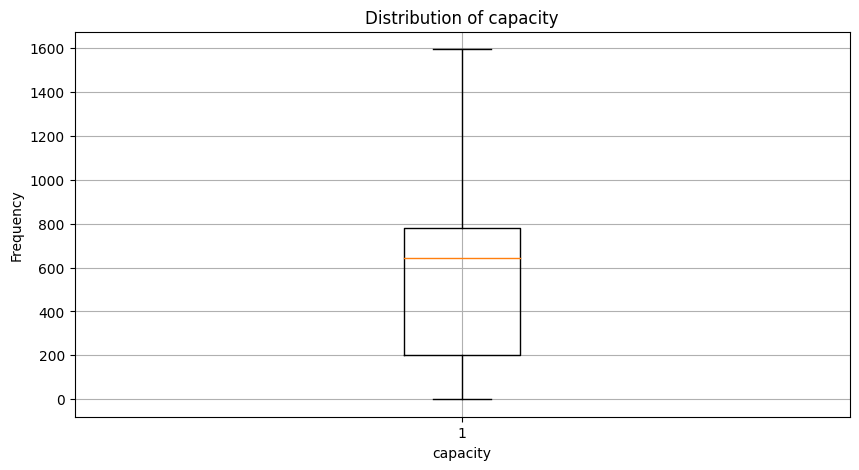

In [52]:
# List of relevant columns
columns_to_plot = ['built_year', 'gross_floor_area', 'room_area', 'capacity']

for col in columns_to_plot:
    plt.figure(figsize=(10, 5))
    plt.boxplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [53]:
df

,campus_id,id,built_year,category,gross_floor_area,room_area,capacity
3,1,4,1967.0,mixed use,145558.14,1790.17,79.0
5,1,6,1998.0,other,6210.75,473.03,0.0
6,1,7,1980.0,teaching,176996.61,2377.77,799.0
14,1,15,1967.0,other,15728.40,1709.43,0.0
15,1,16,1992.0,mixed use,786493.89,5681.03,737.0
16,1,17,1967.0,mixed use,1259005.45,5129.22,616.0
17,1,18,1972.0,mixed use,1405706.16,5353.08,775.0
19,1,20,1973.0,residence,42646.40,871.42,0.0
22,1,23,1970.0,office,558322.60,4626.98,481.0
23,1,24,1967.0,mixed use,1558475.10,5485.43,552.0


### Time Series Analysis

In [54]:
df['built_year'] = pd.to_datetime(df['built_year'])
data = df.sort_values('built_year')


C:\Users\Ibtasam Ahmad\AppData\Local\Temp\ipykernel_20012\775606220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['built_year'] = pd.to_datetime(df['built_year'])


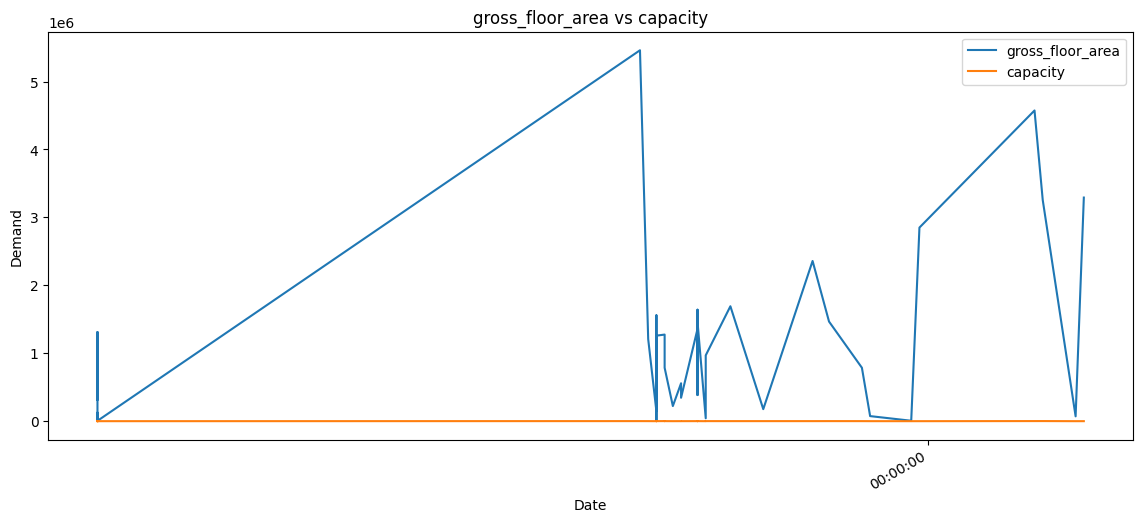

In [57]:
plt.figure(figsize=(14, 6))
data.set_index('built_year')['gross_floor_area'].plot(label='gross_floor_area')
data.set_index('built_year')['capacity'].plot(label='capacity')
plt.title('gross_floor_area vs capacity')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()


<Figure size 1400x600 with 0 Axes>

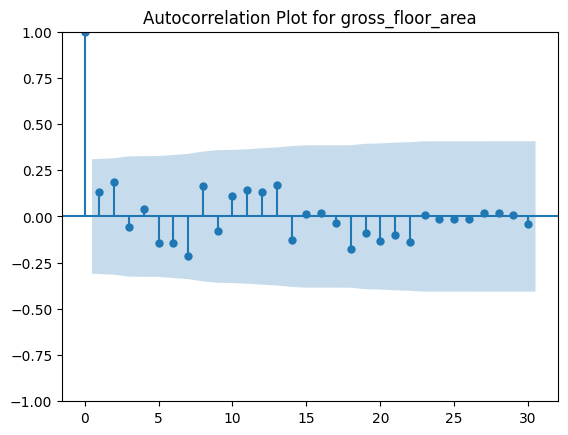

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14,6))
plot_acf(df['gross_floor_area'], lags=30)
plt.title('Autocorrelation Plot for gross_floor_area')
plt.show()


<Figure size 1400x600 with 0 Axes>

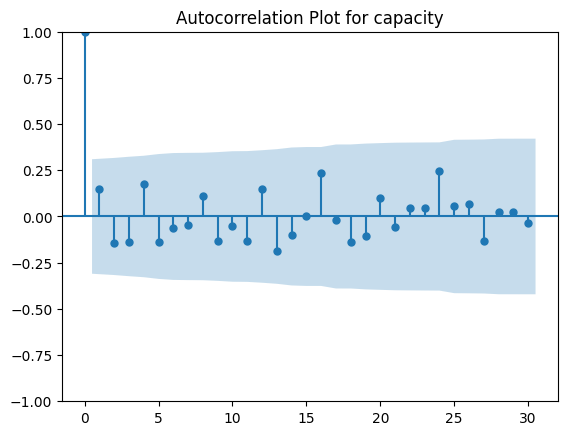

In [61]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14,6))
plot_acf(df['capacity'], lags=30)
plt.title('Autocorrelation Plot for capacity')
plt.show()


<Figure size 1400x600 with 0 Axes>

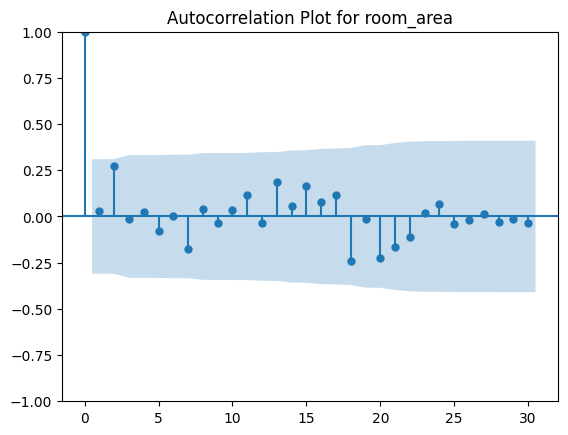

In [62]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(14,6))
plot_acf(df['room_area'], lags=30)
plt.title('Autocorrelation Plot for room_area')
plt.show()


### Consumption Trends Over Time:

Plot a time series graph of consumption over the entire time range.
Analyze any noticeable trends, seasonality, or patterns in the consumption data.

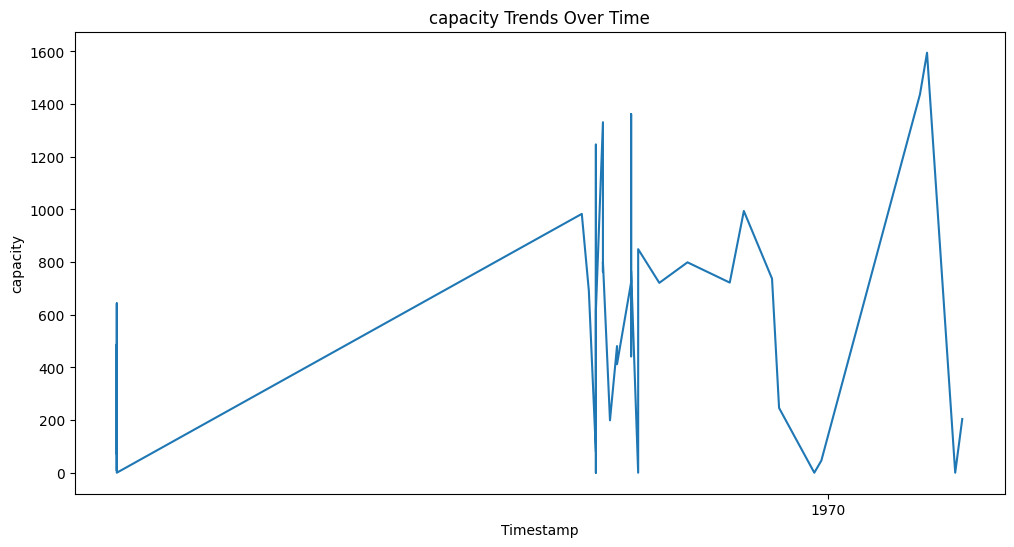

In [66]:
# Consumption Trends Over Time
data['built_year'] = pd.to_datetime(data['built_year'])
plt.figure(figsize=(12, 6))
plt.plot(data['built_year'], data['capacity'])
plt.title('capacity Trends Over Time')
plt.xlabel('Timestamp')
plt.ylabel('capacity')
plt.show()

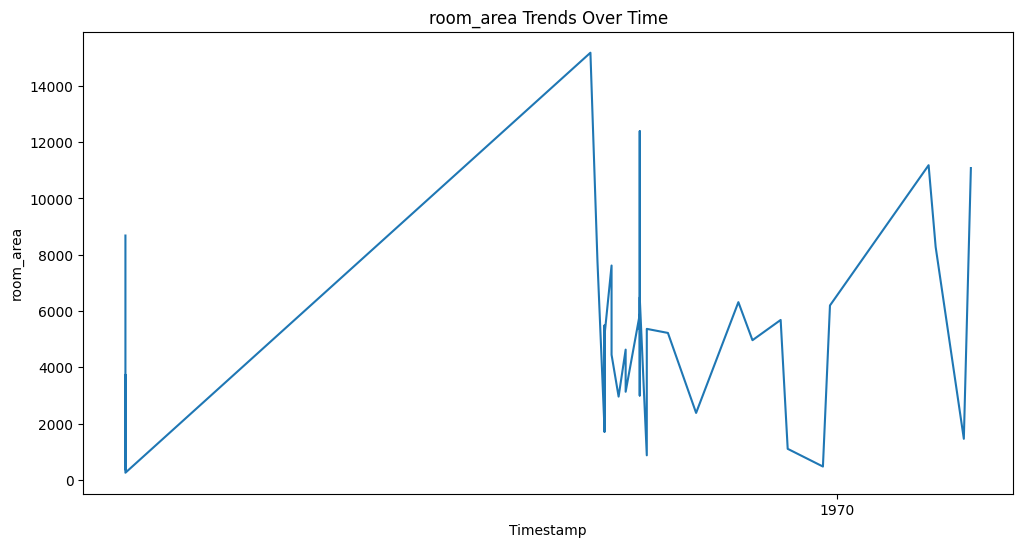

In [65]:
# Consumption Trends Over Time
data['built_year'] = pd.to_datetime(data['built_year'])
plt.figure(figsize=(12, 6))
plt.plot(data['built_year'], data['room_area'])
plt.title('room_area Trends Over Time')
plt.xlabel('Timestamp')
plt.ylabel('room_area')
plt.show()

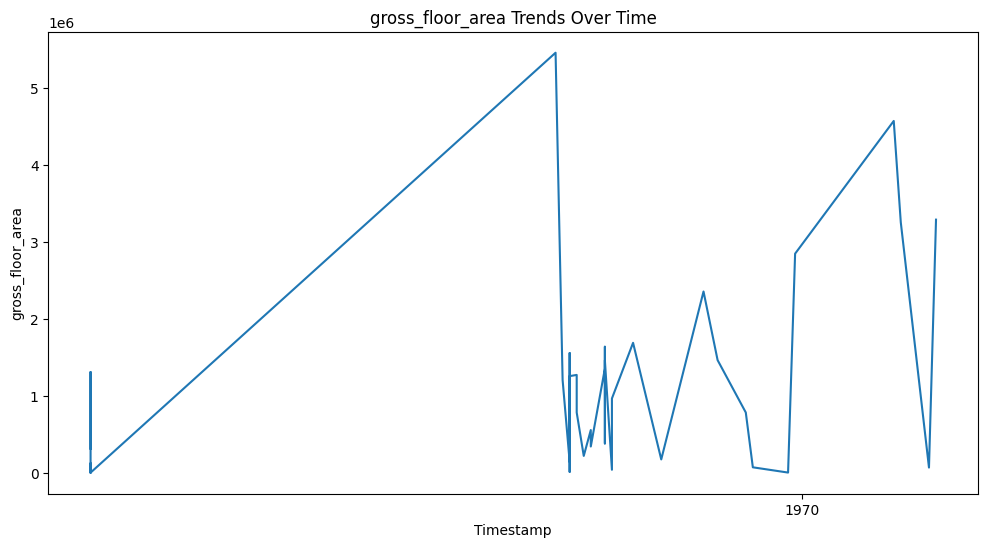

In [67]:
# Consumption Trends Over Time
data['built_year'] = pd.to_datetime(data['built_year'])
plt.figure(figsize=(12, 6))
plt.plot(data['built_year'], data['gross_floor_area'])
plt.title('gross_floor_area Trends Over Time')
plt.xlabel('Timestamp')
plt.ylabel('gross_floor_area')
plt.show()

### Outlier Detection:

Identify and analyze outliers in the consumption data using statistical methods or visualization techniques.

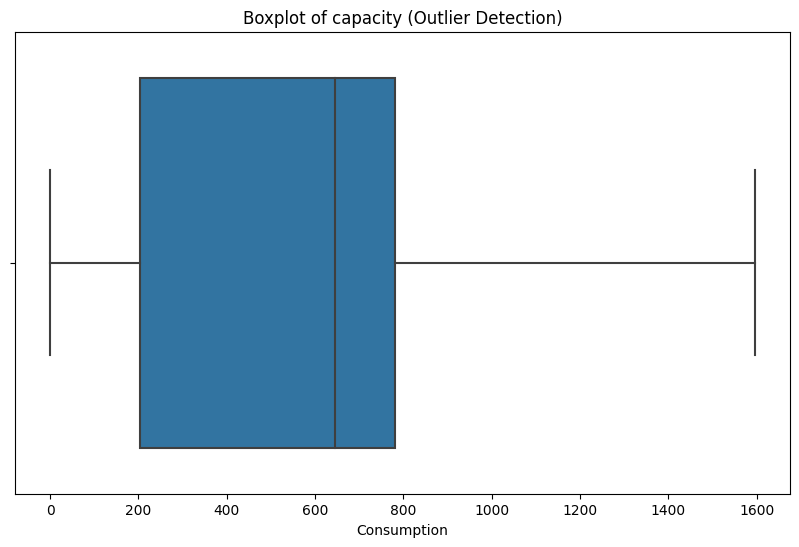

In [68]:
#  Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['capacity'])
plt.title('Boxplot of capacity (Outlier Detection)')
plt.xlabel('Consumption')
plt.show()

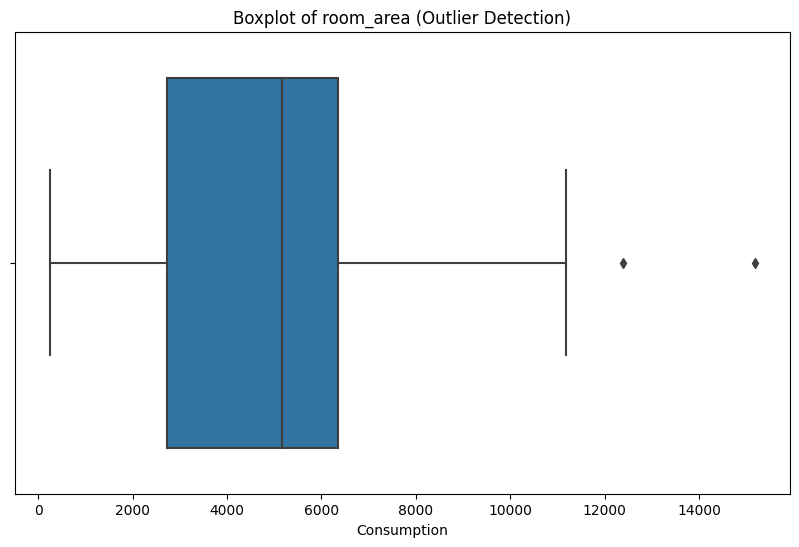

In [69]:
#  Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['room_area'])
plt.title('Boxplot of room_area (Outlier Detection)')
plt.xlabel('Consumption')
plt.show()

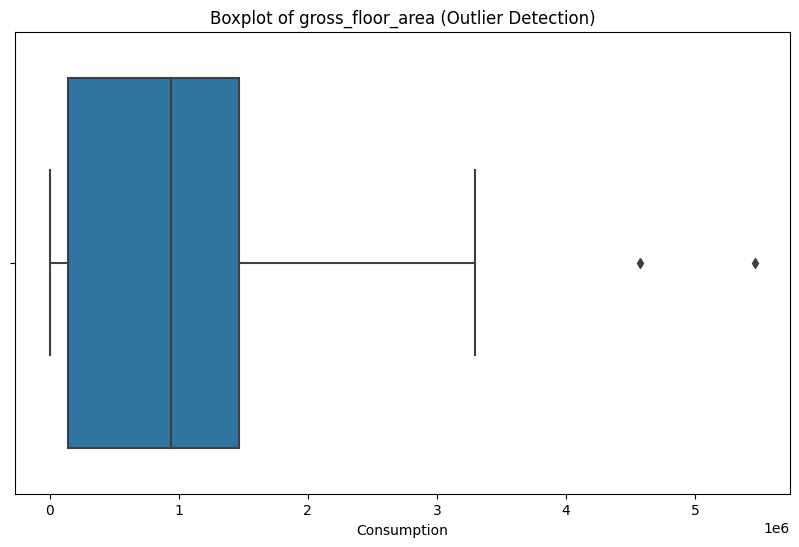

In [70]:
#  Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['gross_floor_area'])
plt.title('Boxplot of gross_floor_area (Outlier Detection)')
plt.xlabel('Consumption')
plt.show()

### Seasonal Decomposition:

Perform seasonal decomposition (e.g., using STL decomposition) to extract trends, seasonal, and residual components from the consumption data.

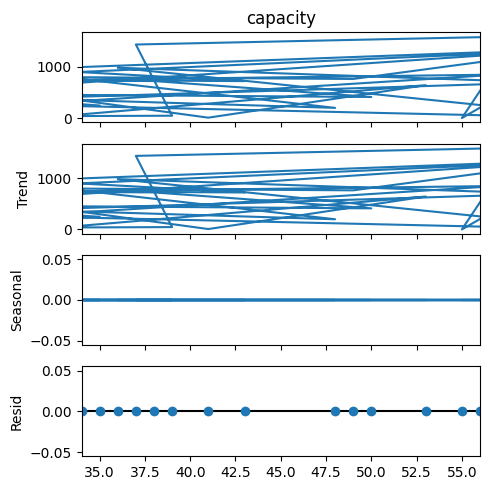

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(x=data['capacity'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('', fontsize=22)
plt.show()


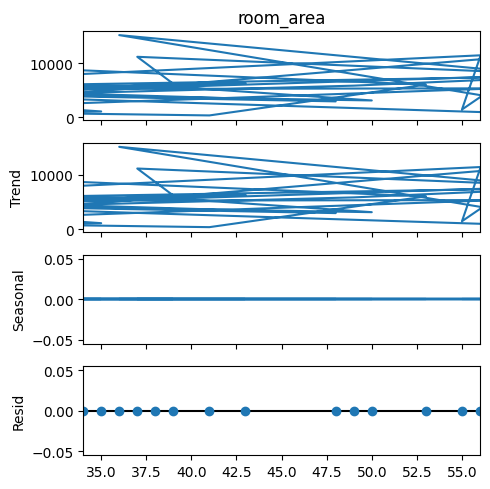

In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(x=data['room_area'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('', fontsize=22)
plt.show()


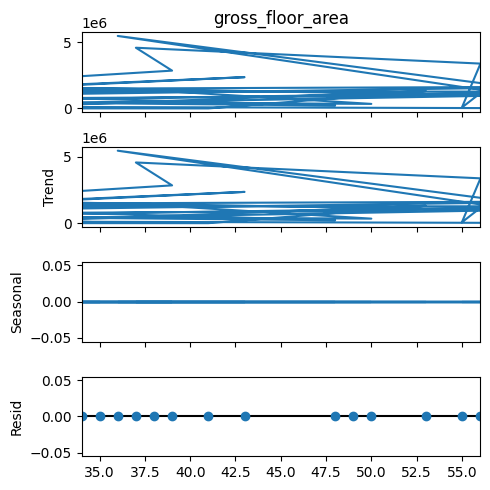

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(x=data['gross_floor_area'], model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('', fontsize=22)
plt.show()


### Data Quality Check:

Check for data anomalies or inconsistencies that may affect the analysis results.
Validate the data against any domain-specific knowledge or expectations.

In [75]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")
    print(duplicate_rows)

# Check for negative consumption values
negative_consumption = data[data['capacity'] < 0]
if negative_consumption.empty:
    print("No negative consumption values found.")
else:
    print("Negative consumption values found.")
    print(negative_consumption)

# Check for inconsistent timestamp formats or missing timestamps
sorted_data = data.sort_values(by='built_year')
time_diff = sorted_data['built_year'].diff().dropna()
if (time_diff.dt.total_seconds() > 900).any():
    print("Timestamps are not consistently spaced (greater than 15 minutes apart).")
else:
    print("Timestamps are consistently spaced (15 minutes apart).")


No duplicate rows found.
No negative consumption values found.
Timestamps are consistently spaced (15 minutes apart).
